## Prediction Stroke Patients

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

### Import Dataset. Target Variable is 'Stroke'

In [16]:
data = pd.read_csv('E:\work\DataSets\healthcare-dataset-stroke-data.csv')

In [17]:
data.shape

(5110, 12)

In [18]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Datasets Shape

In [20]:
print ('Train Data Shape: {}'.format(data.shape))


Train Data Shape: (5110, 12)


### Description of  Data 

In [21]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Preprocessing

### Data Cleaning

### Missing Values for  Data

In [22]:
data.isnull().sum()/len(data)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

### In bmi 3.93%  of data is missed 

#### we fill missing values in bmi with average of bmi column

In [17]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean())

### Handling Categorical Variables

In [18]:
label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['ever_married'] = label.fit_transform(data['ever_married'])
data['work_type']= label.fit_transform(data['work_type'])
data['Residence_type']= label.fit_transform(data['Residence_type'])
data['smoking_status']= label.fit_transform(data['smoking_status'])

In [19]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [20]:
data.corr('pearson')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


### Handling Imbalanced Data
#### Now lets look at the number of positive and negative cases we have for stroke data

In [41]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### we can see imbalanced data set, if we go ahead with that there is a high possibility that ML algorithm will predict no stroke for all data. 

#### I am using ROSE method to deal with that and make data more balanced which generates artificial data to make the set more balanced

In [8]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [21]:
X_resampled, y_resampled = ros.fit_resample(data.loc[:,data.columns!='stroke'], data['stroke'])

In [22]:
print ('ROS independent Data after oversampling: {}'.format(X_resampled.shape))
print ('ROS label Data Shape after oversampling : {}'.format(y_resampled.shape))

ROS independent Data after oversampling: (9722, 11)
ROS label Data Shape after oversampling : (9722,)


#### check for balancing in both class

In [23]:
y_resampled.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

### Train Test Split of the balanced Data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7777, 11)
(1945, 11)


## Applying Model


### Decision Tree Classifier 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       959
           1       0.96      1.00      0.98       986

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

0.9773778920308483
[[915  44]
 [  0 986]]
precision =  0.9572815533980582 
 recall =  1.0


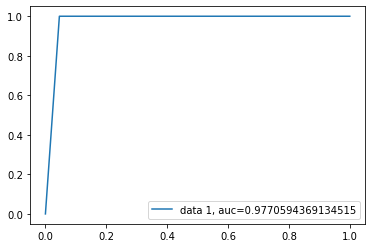

                   Importance
age                  0.464381
avg_glucose_level    0.182013
id                   0.135614
bmi                  0.113142
smoking_status       0.034182
work_type            0.015294
gender               0.015125
Residence_type       0.012571
hypertension         0.010235
heart_disease        0.009639
ever_married         0.007804


In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=data.loc[:,data.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### Logistic Regression Classifier 

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       959
           1       0.71      0.76      0.74       986

    accuracy                           0.72      1945
   macro avg       0.72      0.72      0.72      1945
weighted avg       0.72      0.72      0.72      1945

0.7213367609254498
[[650 309]
 [233 753]]
precision =  0.7090395480225988 
 recall =  0.7636916835699797


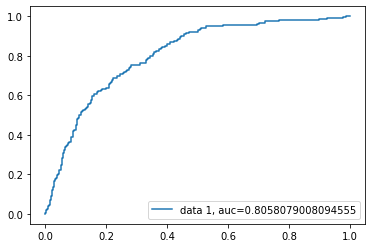

                   Importance
age                  0.464381
avg_glucose_level    0.182013
id                   0.135614
bmi                  0.113142
smoking_status       0.034182
work_type            0.015294
gender               0.015125
Residence_type       0.012571
hypertension         0.010235
heart_disease        0.009639
ever_married         0.007804


In [27]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=data.loc[:,data.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### Random Forest Classifier 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       959
           1       0.98      1.00      0.99       986

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

0.9917737789203085
[[943  16]
 [  0 986]]
precision =  0.9840319361277445 
 recall =  1.0


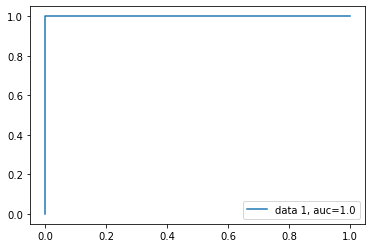

                   Importance
age                  0.464381
avg_glucose_level    0.182013
id                   0.135614
bmi                  0.113142
smoking_status       0.034182
work_type            0.015294
gender               0.015125
Residence_type       0.012571
hypertension         0.010235
heart_disease        0.009639
ever_married         0.007804


In [29]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train,y_train)

pred = ran.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=data.loc[:,data.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### Feature Importance with random Forest

<AxesSubplot:>

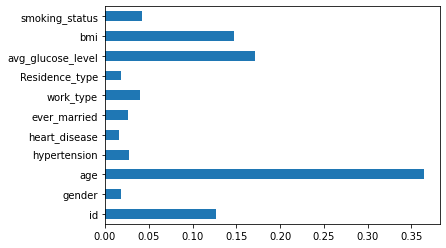

In [30]:
feat_importances = pd.Series(ran.feature_importances_, index=data.loc[:,data.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

### Conclusion
We had to deal with imbalanced data which is common in such healthcare problems. For improving the model we could try out other ways of dealing with imbalanced data like <b>SMOTE</b>.
We created 3 classifier with Decision Tree,Logistic Regression and Random Forest to forecast weather a patient can have stroke or not.<b>Random Forest with F-score=0.99</b>,<b>Decision Tree with F-score=0.98<b>and </b>Logistic Regression with F-score= 0.72.</b>
Most effective features on models are <b>age</b> around 46% importance, <b>avg_glucose_level</b> around 18% importance, <b>bmi</b> around 11% importance.

